### Project 2

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
nanDict = {}
df = pd.read_excel('creditcard_data.xls', header=1, skiprows=0, index_col=0, na_values=nanDict)
df.rename(index=str, columns={"default payment next month": "defaultPaymentNextMonth"}, inplace=True)# Features and targets 

df = df.drop(df[(df.BILL_AMT1 == 0) &
                (df.BILL_AMT2 == 0) &
                (df.BILL_AMT3 == 0) &
                (df.BILL_AMT4 == 0) &
                (df.BILL_AMT5 == 0) &
                (df.BILL_AMT6 == 0)].index)

df = df.drop(df[(df.PAY_AMT1 == 0) &
                (df.PAY_AMT2 == 0) &
                (df.PAY_AMT3 == 0) &
                (df.PAY_AMT4 == 0) &
                (df.PAY_AMT5 == 0) &
                (df.PAY_AMT6 == 0)].index)

X = df.loc[:, df.columns != 'defaultPaymentNextMonth'].values
y = df.loc[:, df.columns == 'defaultPaymentNextMonth'].values

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencoder = OneHotEncoder(categories = "auto")

X = ColumnTransformer(
    #[("", onehotencoder, [3],)], 
    [("", onehotencoder, [1, 2, 3, 4]),],
    remainder="passthrough"
).fit_transform(X)

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, test_size = 1-0.5)

In [105]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()#(with_mean = False)
X_train = sc.fit_transform(X_train.toarray(), y_train)
X_test = sc.transform(X_test.toarray())

# One-hot's of the target vector
#Y_train_onehot, Y_test_onehot = onehotencoder.fit_transform(y_train), onehotencoder.fit_transform(y_test)

In [19]:
total = y.shape[0]
num_ones = np.count_nonzero(y)
num_zeros = total - num_ones

assert (num_ones + num_zeros == total)

frac_ones = num_ones / total
print(frac_ones)
frac_zeros = num_zeros / total
print(frac_zeros)

0.21314524335895008
0.78685475664105


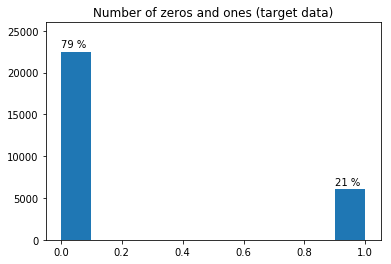

In [29]:
import matplotlib.pyplot as plt

plt.hist(y)
plt.ylim(0, 26000)
plt.title('Number of zeros and ones (target data)')
plt.text(0, 23000, '79 %')
plt.text(0.9, 6500, '21 %')
plt.show()

In [8]:
def sigmoid(x):

    sigmoid = 1 / (1 + np.exp(-x))
    
    return sigmoid

In [9]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, r2_score, mean_squared_error, log_loss

In [106]:
# LOGISTIC REGRESSION

learning_rate = 0.001
beta = np.random.randn(X_train.shape[1], 1)
num_iter = 1000

accuracy = list()
f1 = list()
accuracy_test = list()
f1_test = list()


for iteration in range(num_iter):
    #sigmoid = 1 / (1 + np.exp(- (X_train @ beta)))
    x = X_train @ beta
    grad = (np.transpose(X_train) @ (sigmoid(x) - y_train))

    beta -= learning_rate*grad

    #cost_function = - ( np.sum(np.transpose(y_train) @ np.log(sigmoid(x)) - np.transpose(1 - y_train) @ np.log(sigmoid(-x))) )    
    #print(cost_function)

    # ACCURACY (training data)
    y_pred = sigmoid(X_train @ beta)
    y_pred[y_pred >= 0.5] = 1
    y_pred[y_pred < 0.5] = 0
    
    
    accuracy.append(accuracy_score(y_train, y_pred))
    f1.append(f1_score(y_train, y_pred))
    
    # ACCURACY (test data)
    y_pred_test = sigmoid(X_test @ beta)
    y_pred_test[y_pred_test >= 0.5] = 1
    y_pred_test[y_pred_test < 0.5] = 0
    
    
    accuracy_test.append(accuracy_score(y_test, y_pred_test))
    f1_test.append(f1_score(y_test, y_pred_test))
    

In [107]:
confusion_matrix(y_train, y_pred)/np.sum(confusion_matrix(y_train, y_pred))

array([[0.49003369, 0.29814711],
       [0.09229366, 0.11952555]])

In [11]:
y_pred_test = sigmoid(X_test @ beta)

y_pred_test[y_pred_test >= 0.5] = 1
y_pred_test[y_pred_test < 0.5] = 0

#np.mean(y_pred_test == y_test)

In [102]:
print('Acc', accuracy_score(y_test, y_pred_test))
print('F1', f1_score(y_test, y_pred_test))
print('Conf\n', confusion_matrix(y_test, y_pred_test)) # /y_test.shape[0]
print('R2', r2_score(y_test, y_pred_test))
print('MSE', mean_squared_error(y_test, y_pred_test))

Acc 0.5171590988841323
F1 0.400278940027894
Conf
 [[5073 6168]
 [ 712 2296]]
R2 -1.8992792342621145
MSE 0.4828409011158678


In [60]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=500, class_weight='balanced')
clf.fit(X_train,np.ravel(y_train))
y_pred_sk = clf.predict(X_test)

C:\Users\Mina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [61]:
print(accuracy_score(y_test, y_pred_sk))
print(f1_score(y_test, y_pred_sk))
print(confusion_matrix(y_test, y_pred_sk))

0.6979437153484455
0.4758889430102289
[[7991 3178]
 [1126 1954]]


In [86]:
y_pred = sigmoid(X_train @ beta)

y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0

np.mean(y_pred == y_train)

0.7909180235822572

In [109]:
import seaborn as sb

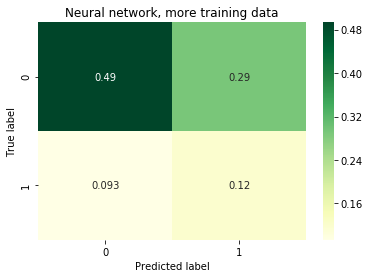

In [110]:
conf_mat_own = confusion_matrix(y_test, y_pred_test)
fig = sb.heatmap(conf_mat_own/np.sum(conf_mat_own), annot=True, cmap=plt.cm.YlGn, yticklabels=['0', '1'])
fig.set_yticks([0.5, 1.5])
fig.set_xticks([0.5, 1.5])
fig.set(xlabel='Predicted label', ylabel='True label', title='Neural network, more training data')
plt.show()

In [112]:
f1_score(y_test, y_pred_test)

0.3861884009386523